In [3]:
# script that produces plots to investigate the TiP genes

import pandas, numpy
from custom_settings import *
import basic_functions
import config
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from utils import load_id_map

In [4]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42  # TrueType fonts for ease of editing in illustrator
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7.0
mpl.rcParams['savefig.dpi'] = 500


In [5]:
GTEx = pandas.read_table(config.expr_file,index_col=0)

TiPmatrix_old = pandas.read_table(config.pref_expr_file,index_col=0)

new_TiP_file = config.data_path + 'GTExv6_tissue_specificity_data_no_cutoff_PC_no_cell_no_testis.txt'
TiPmatrix_new = pandas.read_table(new_TiP_file,index_col=0)

tissues = TiPmatrix_old.columns
for tissue in tissues:
    TiPmatrix_old.loc[TiPmatrix_old.index.isin(GTEx.index[GTEx[tissue]<=5]),[tissue]] = numpy.NaN
    if tissue != 'testis':
        TiPmatrix_new.loc[TiPmatrix_new.index.isin(GTEx.index[GTEx[tissue]<=5]),[tissue]] = numpy.NaN

file1 = open(config.data_path + 'GTExv6_JPnorm_subtypes_no_cell_publ.txt','r')
entries = file1.readlines()
file1.close()
publ_tissue_names = [line[:-1] for line in entries]

In [6]:
path = config.analysis_path + 'GTExv6/'

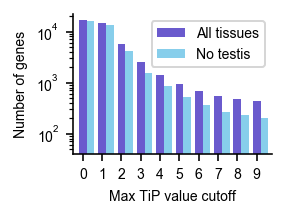

In [7]:
# compare total number of TiP genes for increasing TiP cutoffs

# get a dataframe listing for every gene the max TiP value from old and new file
maxTiP_df = pandas.DataFrame({},columns=[],index=TiPmatrix_old.index)
maxTiP_df['maxTiP_old'] = TiPmatrix_old.max(axis=1)
maxTiP_df['maxTiP_new'] = TiPmatrix_new.max(axis=1)

# get a dataframe that lists the number of TiP genes for increasing TiP cutoffs
TiPcount = pandas.DataFrame({'cutoff':range(41)},columns=['cutoff'])
TiPcount['TiPcount_old'] = TiPcount.apply(lambda x: maxTiP_df.loc[maxTiP_df['maxTiP_old'] >= x['cutoff'],].shape[0],
                                          axis=1)
TiPcount['TiPcount_new'] = TiPcount.apply(lambda x: maxTiP_df.loc[maxTiP_df['maxTiP_new'] >= x['cutoff'],].shape[0],
                                          axis=1)

plt.figure(figsize=(2,1.5))
plt.bar(TiPcount['cutoff'],TiPcount['TiPcount_old'],width=0.4,color='slateblue',label='All tissues')
plt.bar([i+0.4 for i in TiPcount['cutoff']],TiPcount['TiPcount_new'],width=0.4,color='skyblue',label='No testis')
plt.xlabel('Max TiP value cutoff')
plt.ylabel('Number of genes')
plt.xticks(range(10),range(10))
plt.legend(loc='best')
plt.xlim([-0.5,9.8])
#plt.ylim([0,1000])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log', basey=10, nonposy='clip')
plt.tight_layout()
outfile = '../figures/num_TiP_genes_testis_wo_testis_per_TiPcutoff.'
plt.savefig(outfile + 'png',fmt='png')
plt.savefig(outfile + 'pdf',fmt='pdf')
plt.show()

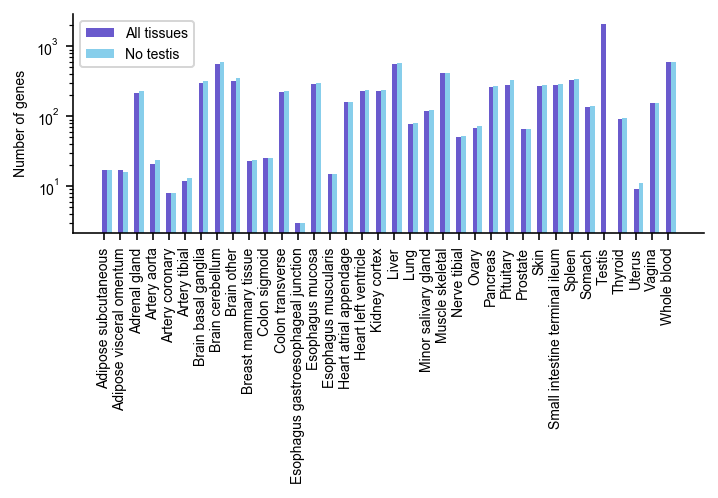

In [8]:
# compare # of TiP genes per tissue
TiPperTissue = TiPmatrix_old.apply(lambda y: y[y>=2].shape[0],axis=0)
TiPperTissue = pandas.DataFrame(TiPperTissue,columns=['TiPcount_old'])
TiPperTissue.index.name = 'tissue'
TiPperTissue['TiPcount_new'] = TiPmatrix_new.apply(lambda y: y[y>=2].shape[0],axis=0)

plt.figure(figsize=(5,3.5))
plt.bar(range(TiPperTissue.shape[0]),TiPperTissue['TiPcount_old'],width=0.3,color='slateblue',label='All tissues')
plt.bar([i+0.3 for i in range(TiPperTissue.shape[0])],TiPperTissue['TiPcount_new'],width=0.3,color='skyblue',label='No testis')
plt.xticks(range(TiPperTissue.shape[0]),publ_tissue_names,rotation=90)
plt.ylabel('Number of genes')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log', basey=10, nonposy='clip')
plt.legend(loc='best')
plt.tight_layout()
outfile = '../figures/num_TiP_genes_per_tissue_testis_wo_testis.'
plt.savefig(outfile + 'png',fmt='png')
plt.savefig(outfile + 'pdf',fmt='pdf')
plt.show()

In [9]:
# compare distribution of TiP genes for tissues at varying TiP cutoffs
tissues = TiPmatrix_old.columns
TiPcount_tis_cutoffs_old = pandas.DataFrame(dict([(t,[0 for i in range(41)]) for t in tissues]))
TiPcount_tis_cutoffs_old.index.name = 'TiPcutoff'
for tissue in tissues:
    TiPcount_tis_cutoffs_old[tissue] = TiPcount_tis_cutoffs_old.apply(lambda x: TiPmatrix_old.loc[TiPmatrix_old[tissue] >= x.name,].shape[0], axis=1)

TiPcount_tis_cutoffs_new = pandas.DataFrame(dict([(t,[0 for i in range(41)]) for t in tissues]))
TiPcount_tis_cutoffs_new.index.name = 'TiPcutoff'
for tissue in tissues:
    if tissue != 'testis':
        TiPcount_tis_cutoffs_new[tissue] = TiPcount_tis_cutoffs_new.apply(lambda x: TiPmatrix_new.loc[TiPmatrix_new[tissue] >= x.name,].shape[0], axis=1)


In [10]:
TiPcount_red = TiPcount_tis_cutoffs_old.sum(axis=1)
TiPcount_red = pandas.DataFrame(TiPcount_red,columns=['TiPcount_old'])
TiPcount_red['TiPcount_new'] = TiPcount_tis_cutoffs_new.sum(axis=1)

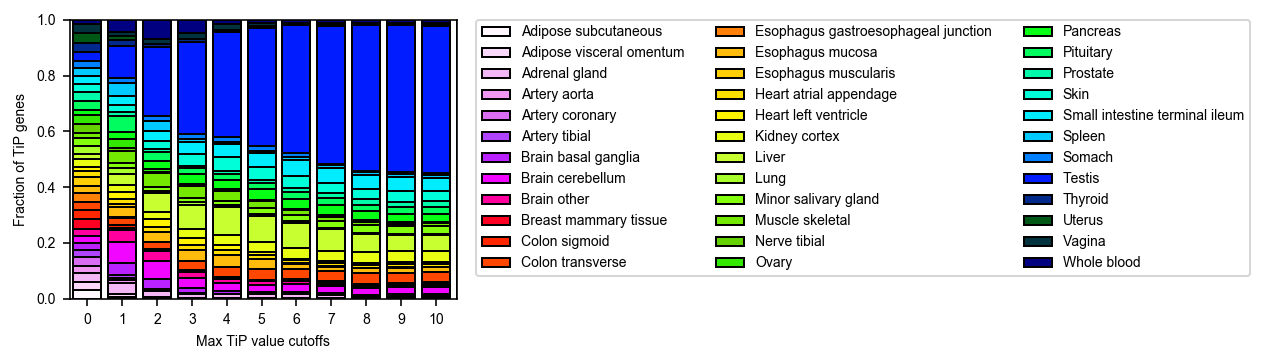

In [11]:
color=iter(cm.gist_ncar(numpy.linspace(0,1,len(tissues)))[::-1])
plt.figure(figsize=(3.5,2.5))
bottom = [0.0 for i in range(41)]
for t,tissue in enumerate(tissues):
    c = next(color)
    fracs = TiPcount_tis_cutoffs_old[tissue]/TiPcount_red['TiPcount_old']
    plt.bar(TiPcount_tis_cutoffs_old.index.tolist(),fracs,bottom=bottom,edgecolor='black',color=c,label=publ_tissue_names[t])
    bottom = [bottom[i] + fracs[i] for i in range(41)]
lgd = plt.legend(bbox_to_anchor=(1.05, 1,2,0),loc=2,ncol=3,mode="expand",borderaxespad=0.)
#plt.title('Fraction of TiP genes per tissue and TiP cutoff - with testis',fontsize=14)
plt.ylabel('Fraction of TiP genes')
plt.xlabel('Max TiP value cutoffs')
plt.xticks(range(41),range(41))
plt.xlim([-0.5,10.6])
plt.tight_layout()
outfile = '../figures/frac_TiP_genes_from_tissue_with_testis.'
plt.savefig(outfile + 'png',fmt='png',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(outfile + 'pdf',fmt='pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [13]:
# get expression profile plot for a given gene (symbol or ensg ID accepted)
# gene symbols of genes shown in figure for TiP definition:
# genes = ['RPS28','UQCRQ','ADH4','GCG']
gene = 'ADH4'
id_map = load_id_map('ensembl_gene_id', 'hgnc_symbol')
if gene[:4] != 'ENSG':
    gene_symbol = gene
    gene_id = id_map.loc[id_map['hgnc_symbol'] == gene, 'ensembl_gene_id'].values[0]
else:
    gene_symbol = id_map.loc[id_map['ensembl_gene_id'] == gene, 'hgnc_symbol'].values[0]
    gene_id = gene
    
print(gene_symbol, gene_id)

file1 = open(config.NT_cond_file,'r')
tissues = file1.readlines()
file1.close()
tissues = [c[:-1] for c in tissues]

values = []

for tissue in tissues:
    file1 = open('../data/katjas_data/GTEx/expression_datasets/GTExv6_JPnorm/' + tissue + '.txt','r')
    for line in file1:
        if line[:15] == gene_id:
            tab_list = str.split(line[:-1],'\t')[1:]
            values.append([float(v) for v in tab_list])
            break

tissues[tissues.index('esophagus_gastroesophageal_junction')] = 'EG_junction'
tissues[tissues.index('small_intestine_terminal_ileum')] = 'small_intestine_TI'
tissues[tissues.index('brain-0')] = 'brain_basal_ganglia'
tissues[tissues.index('brain-1')] = 'brain_cerebellum'
tissues[tissues.index('brain-2')] = 'brain_other'

ADH4 ENSG00000198099


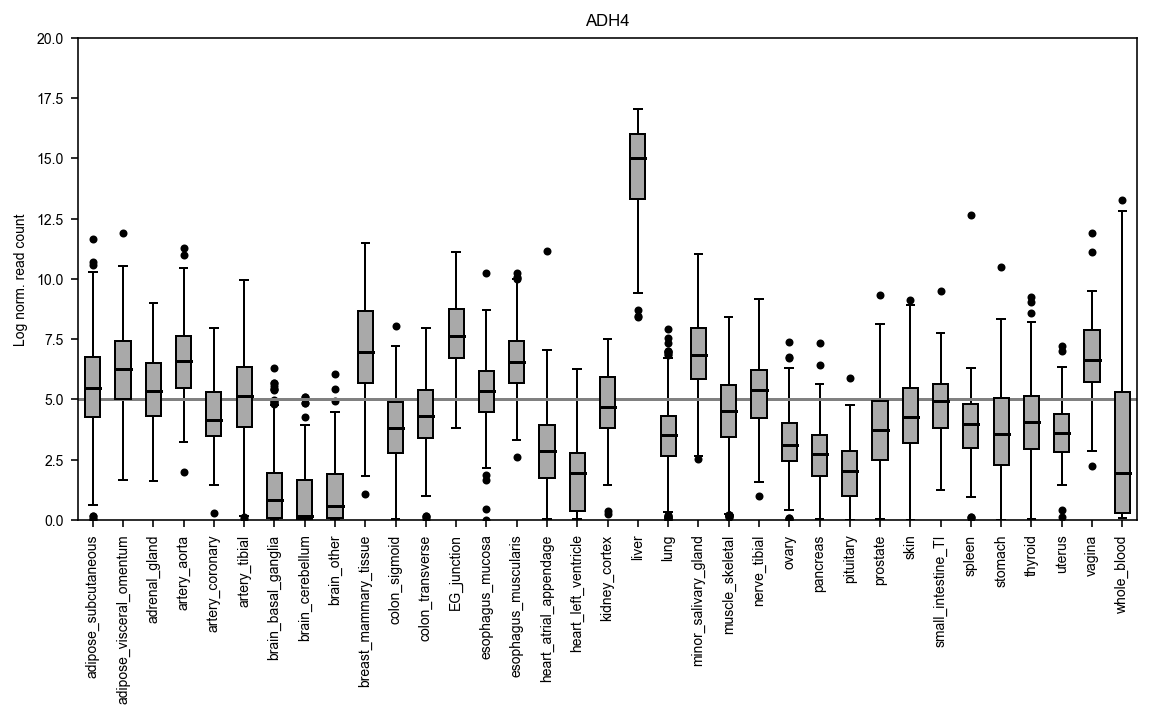

In [14]:
boxprops = dict(color='black')
flierprops = dict(marker='.',markerfacecolor='black',markersize='6',linestyle='')
medianprops = dict(color='black',linestyle='-',linewidth=1.5)
plt.figure(figsize=(8,5))
pa = plt.boxplot(values,boxprops=boxprops,flierprops=flierprops,medianprops=medianprops,patch_artist=True)
for b,box in enumerate(pa['boxes']):
    box.set(facecolor='darkgrey')
plt.axhline(5,color='grey')
plt.title(gene_symbol)
plt.ylim([0,20])
plt.ylabel('Log norm. read count')
plt.xticks(range(1,len(tissues)+1),tissues,rotation=90)
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/gene_expr_profile_' + gene_symbol + fmt)

In [19]:
# getting the n samples values
'; '.join(['{}: {}'.format(t, len(l)) for t, l in zip(tissues, values)])

'adipose_subcutaneous: 380; adipose_visceral_omentum: 234; adrenal_gland: 159; artery_aorta: 247; artery_coronary: 140; artery_tibial: 357; brain_basal_ganglia: 779; brain_cerebellum: 254; brain_other: 360; breast_mammary_tissue: 217; colon_sigmoid: 173; colon_transverse: 203; EG_junction: 176; esophagus_mucosa: 330; esophagus_muscularis: 283; heart_atrial_appendage: 217; heart_left_ventricle: 267; kidney_cortex: 36; liver: 137; lung: 360; minor_salivary_gland: 70; muscle_skeletal: 469; nerve_tibial: 334; ovary: 108; pancreas: 193; pituitary: 124; prostate: 119; skin: 661; small_intestine_TI: 104; spleen: 118; stomach: 204; thyroid: 355; uterus: 90; vagina: 97; whole_blood: 444'

In [21]:
(min([len(l) for l in values]), max([len(l) for l in values]))

(36, 779)

In [32]:
# read in the GTEx and TiP value data
# the GTEx data contains testis, the TiP data does not
TiPmatrix = pandas.read_csv('../data/processed/Supplementary Table 27.txt', sep='\t').set_index('Ensembl_gene_id')
GTEx = pandas.read_csv('../data/processed/Supplementary Table 22.txt', sep='\t').set_index('Ensembl_gene_id')

GTEx_tissues = TiPmatrix.columns
for tissue in GTEx_tissues:
    TiPmatrix.loc[TiPmatrix.index.isin(GTEx.index[GTEx[tissue]<=5]),[tissue]] = numpy.NaN
    
maxTiP_series = TiPmatrix.max(axis=1,numeric_only=True)
maxTiP_series.dropna(inplace=True)
maxTiP_series.sort_values(inplace=True)
GTEx_genes = set(maxTiP_series.index.tolist())

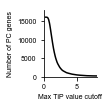

In [33]:
# plot the number of PC genes titrated by their max TiP value
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1.5, 1.5)
plt.plot(maxTiP_series.tolist()[::-1],range(maxTiP_series.shape[0]),marker='',linestyle='-',color='black')
plt.xlim([0,8])
plt.ylim([0,18000])
plt.xlabel('Max TiP value cutoff')
plt.ylabel('Number of PC genes')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/num_genes_by_TiPcutoff' + fmt)

In [36]:
# read in the gene expression data
import condition_network_classes_v6
GTEx = condition_network_classes_v6.Transcriptome(config.expr_file,config.gene_expr_cutoff)
GTEx.load_expression_data_ENSG()
TiP_value_dict = {}
expr_cutoff = 5
file1 = open(config.data_path + 'GTExv6_tissue_specificity_data_no_cutoff_PC_no_cell.txt','r')
entries = file1.readlines()
file1.close()
tissues = entries[0][:-1].split('\t')[1:]
for line in entries[1:]:
    tab_list = str.split(line[:-1],'\t')
    geneID = tab_list[0]
    values = [float(v) for v in tab_list[1:]]
    if geneID in GTEx.gene_expr_dict:
        TiP_value_dict[geneID] = {}
        for t,tissue in enumerate(tissues):
            if GTEx.gene_expr_dict[geneID][tissue] > expr_cutoff:
                TiP_value_dict[geneID][tissue] = values[t]


In [44]:
sgl_tis_genes = set()
for geneID,cond_dict in GTEx.gene_expr_dict.items():
    values = cond_dict.values()
    num_cond = len(list(filter(lambda value: value > config.gene_expr_cutoff,values)))
    if num_cond == 1:
        sgl_tis_genes.add(geneID)


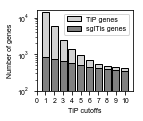

In [51]:
# plot as bar plot the number of TiP genes for a given TiP cutoff and below the number of sglTis genes there in
TiP_cutoffs = range(1,11)
TiP_gene_counts = []
sglTis_gene_counts = []
value_lists = [(tup[0],tup[1].values()) for tup in TiP_value_dict.items()]
max_TiPs = [(tup[0],max(tup[1])) for tup in value_lists]
for TiP_cutoff in TiP_cutoffs:
    sub_TiP_genes = set([t[0] for t in filter(lambda t: t[1] >= TiP_cutoff,max_TiPs)])
    TiP_gene_counts.append(len(sub_TiP_genes))
    sglTis_gene_counts.append(len(sub_TiP_genes.intersection(sgl_tis_genes)))
    
plt.figure(figsize=(2,1.7))
plt.bar(TiP_cutoffs,TiP_gene_counts,color='lightgrey',edgecolor='black',label='TiP genes')
plt.bar(TiP_cutoffs,sglTis_gene_counts,color='grey',edgecolor='black',label='sglTis genes')
plt.xticks(range(len(TiP_cutoffs)+1),['0'] + [str(i) for i in TiP_cutoffs])
plt.ylim([100,16000])
ax = plt.gca()
ax.set_yscale('log', basey=10, nonposy='clip')
plt.xlabel('TiP cutoffs')
plt.ylabel('Number of genes')
plt.legend(loc='best')
plt.tight_layout()
outfile_plot = '../figures/num_TiP_genes_sglTis_genes_per_TiPcutoff.pdf'
plt.savefig(outfile_plot)
plt.show()